# 5. Improving the Model


First Model - Baseline Model
First Predictions - Baseline Prediction

As you go on after the first model we improve upon the base line model
Two main ways - 
#### 1. Data Prespective 
    * Data Quantity: Could we collect more data?(The more data the better)
    * Data Quality: Could we improve our data?(More features)
#### 2. Model Prespective
    * Is there a better model we can use? (Sklearn ML map)
    * Could we improve the current model? (Hyperparameter tunning)
    
#### Hyperparameter vs. Parameters 
    * Parameter - Model finds these patterns in data
    * Hyperparameter - Setting in the model you can adjust to potentially its ability to 
    find patterns. 

#### Three ways to adjust hyperparamters
1. By Hand
2. Randommly with RandomSearchCV
3. Exhustively with GridSearchCV

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Get California housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

housing_df = pd.DataFrame(housing["data"],columns=housing['feature_names'])

housing_df['target'] = housing['target']
housing_df.head()


from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
np.random.seed(42)

# create x & y
x = housing_df.drop('target',axis=1)
y = housing_df['target']

# split the data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

#create model
model = RandomForestRegressor()
#fit model
model.fit(x_train,y_train)

y_preds = model.predict(x_test)

#evaluate model using evaluate funcutions
print("Regression metrics on the test set")
print(f"R2: {r2_score(y_test,y_preds)}")
print(f"MAE: {mean_absolute_error(y_test,y_preds)}")
print(f"MSE: {mean_squared_error(y_test,y_preds)}")


Regression metrics on the test set
R2: 0.8066196804802649
MAE: 0.3265721842781009
MSE: 0.2534073069137548


In [2]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

heart_disease = pd.read_csv('./../data/heart-disease.csv')

# create x & y
x = heart_disease.drop('target',axis=1)
y = heart_disease['target']

# split the data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

#create model
clf = RandomForestClassifier()

#fit model
clf.fit(x_train,y_train)

y_preds = clf.predict(x_test)

#evaluate model using evaluate funcutions
print("Classification metrics on the test set")
print(f"Accuracy: {accuracy_score(y_test,y_preds)*100:0.2f}%")
print(f"Precision: {precision_score(y_test,y_preds)}")
print(f"Recall: {recall_score(y_test,y_preds)}")
print(f"F1: {f1_score(y_test,y_preds)}")

Classification metrics on the test set
Accuracy: 85.25%
Precision: 0.8484848484848485
Recall: 0.875
F1: 0.8615384615384615


In [3]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

In [4]:
# All the hyper parameter of a model
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Random Forest Hyperparameters - https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

<img src = "images/sklearn-hyperparameter-tuning-oven.png">

### 5.1 Hyperparameter Tunning - By Hand

<img src = 'images/hyper-tunning-hands.png'>

Let's make 3 sets, training, validation and test. 

<img src='images/data-splits.png'>

#### Which hyperparameter should we choose to adjust. 
    * Take suggestions from sklearn documentation 

Following Hyperparameters we will adjust.
* `max_depth`
* `max_features`
* `min_sample_leaf`
* `min_sample_split`
* `n_estimators`

In [5]:
# Create a funciton to get the metrics 
def evaluate_preds(y_true,y_preds):
    """
    Performs evaluation comparision y_true labels vs. y_pred labels.
    """
    
    accuracy = accuracy_score(y_true,y_preds)
    precision = precision_score(y_true,y_preds)
    recall = recall_score(y_true,y_preds)
    f1 = f1_score(y_true,y_preds)
    metric_dict = {'accuracy': round(accuracy,2),
                 'precision': round(precision,2),
                 'recall': round(recall,2),
                 'f1': round(f1,2)}
    
    print(f"Accuracy: {accuracy*100:0.2f}%")    
    print(f"Precision: {precision:0.2f}")    
    print(f"Recall: {recall:0.2f}")    
    print(f"F1 Score: {f1:0.2f}")
    
    return metric_dict

In [6]:
evaluate_preds(y_test,y_preds);

Accuracy: 85.25%
Precision: 0.85
Recall: 0.88
F1 Score: 0.86


In [7]:
### Split the Data - Train, Test, Validation 

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

#Shuffle the data
heart_disease = pd.read_csv('./../data/heart-disease.csv')
heart_disease_shuffled = heart_disease.sample(frac=1)

# split into x & y
x = heart_disease_shuffled.drop('target',axis=1)
y = heart_disease_shuffled['target']

# split the data into train, validation and test sets. 
# the following are indexs 
train_split = round(0.7 * len(heart_disease_shuffled)) # 70% of the data
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled)) # 15% of the data

x_train, y_train = x[:train_split], y[:train_split]
x_valid,y_valid = x[train_split:valid_split], y[train_split:valid_split]
x_test, y_test = x[valid_split:], y[valid_split:]

len(x_train), len(x_valid), len(x_test)

(212, 45, 46)

In [8]:
# train the baseline model
np.random.seed(42)
clf = RandomForestClassifier()
clf.fit(x_train,y_train)

# baseline prediction 
y_preds = clf.predict(x_valid)

# evaluate the classifier on the validation set
baseline_metrics = evaluate_preds(y_valid,y_preds)

Accuracy: 82.22%
Precision: 0.84
Recall: 0.84
F1 Score: 0.84


In [9]:
# Now play with the Hyperparameters - n_estimators 

np.random.seed(42)

#create a random classifier with different hyperparameters

clf2 = RandomForestClassifier(n_estimators=100)
clf2.fit(x_train,y_train)

# make prediction 
y_preds = clf2.predict(x_valid)

# evaluate the classifier on the validation set
clf2_metrics = evaluate_preds(y_valid,y_preds)

Accuracy: 82.22%
Precision: 0.84
Recall: 0.84
F1 Score: 0.84


In [10]:
# Now play with the Hyperparameters - max_depth 

np.random.seed(42)

#create a random classifier with different hyperparameters

clf3 = RandomForestClassifier(n_estimators=100,max_depth=10)
clf3.fit(x_train,y_train)

# make prediction 
y_preds = clf3.predict(x_valid)

# evaluate the classifier on the validation set
clf3_metrics = evaluate_preds(y_valid,y_preds)

Accuracy: 80.00%
Precision: 0.81
Recall: 0.84
F1 Score: 0.82


### 5.2 Hyperparameter Tunning - RandomizedSearchCV

Randomized search on hyper parameters.

RandomizedSearchCV implements a “fit” and a “score” method. It also implements “score_samples”, “predict”, “predict_proba”, “decision_function”, “transform” and “inverse_transform” if they are implemented in the estimator used.

The parameters of the estimator used to apply these methods are optimized by cross-validated search over parameter settings.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

In [11]:
from sklearn.model_selection import RandomizedSearchCV

# create a dict with the HPs we would like to adjust and the values we like it to try
grid = {"n_estimators":[10,100,200,500,1000,1200],
       "max_depth":[None,5,10,20,30],
       "max_features":['auto','sqrt'],
       "min_samples_split":[2,4,6],
       "min_samples_leaf":[1,2,4]}

np.random.seed(42)

#split into x and y
x = heart_disease_shuffled.drop('target',axis=1)
y = heart_disease_shuffled['target']

#split into train and test sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

#instantiate RandomForestClassifier
# how many processors core are going to be dedicated to this ML model
clf = RandomForestClassifier(n_jobs=1) 

# setup RandomizedSearchCV

rs_clf = RandomizedSearchCV(estimator=clf,
                           param_distributions=grid, # list of HPs and list to try
                           n_iter=10,#number of model to try
                           cv=5, # 5 fold cross validation
                           verbose=2)

# fit the RandomizedSearchCV version of the clf
# it automatically creats cross validation sets - hense we don't have to validate manually
rs_clf.fit(x_train,y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   0.8s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [12]:
# the best cross validated HPs
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [13]:
# make prediction with the best hyperparameters
rs_y_preds = rs_clf.predict(x_test)

#evaluate the predictions
rs_metrics = evaluate_preds(y_test,rs_y_preds)

Accuracy: 81.97%
Precision: 0.77
Recall: 0.86
F1 Score: 0.81


### 5.3 Hyperparamter Tunning - Gird Search CV

Exhaustive search over specified parameter values for an estimator.

GridSearchCV implements a “fit” and a “score” method. It also implements “score_samples”, “predict”, “predict_proba”, “decision_function”, “transform” and “inverse_transform” if they are implemented in the estimator used.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [14]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [15]:
# Gird Search CV will take all the combination and train the model
(6 * 5 * 2 * 3 * 3) * 5 #cross validation

# Total 2700 times to train the model

2700

In [16]:
# so we limit the search space for the Grid search
# reducing the number of HPs list.


# we only keep value from our previous test with RandomSearchCV
grid_2 = {'n_estimators': [100, 200, 500], 
         'max_depth': [None],
         'max_features': ['auto', 'sqrt'],
         'min_samples_split': [6],
         'min_samples_leaf': [1, 2]
         }

# Total this time it is 60 times to train the model

# - now let's do it with code

In [17]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

#split into x and y
x = heart_disease_shuffled.drop('target',axis=1)
y = heart_disease_shuffled['target']

#split into train and test sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

#instantiate RandomForestClassifier
# how many processors core are going to be dedicated to this ML model
clf = RandomForestClassifier(n_jobs=1) 

# setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                           param_grid=grid_2, # list of HPs and list to try
                           cv=5, # 5 fold cross validation
                           verbose=2)

# fit the GirdSearchCV version of the clf
# it automatically creats cross validation sets - hense we don't have to validate manually
gs_clf.fit(x_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
             param_grid={'max_depth': [None], 'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2], 'min_samples_split': [6],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [27]:
gs_clf.best_estimator_

RandomForestClassifier(max_features='sqrt', min_samples_split=6,
                       n_estimators=200, n_jobs=1)

In [28]:
# make prediction with the best hyperparameters
gs_y_preds = gs_clf.predict(x_test)

#evaluate the predictions
gs_metrics = evaluate_preds(y_test,rs_y_preds)

Accuracy: 81.97%
Precision: 0.77
Recall: 0.86
F1 Score: 0.81


In [20]:
# It is trial and error
# you get some idea about the best grid space - and then you prepare 
# new a grid accordingly for the GridSearchCV

#### Now let's create out different models metric



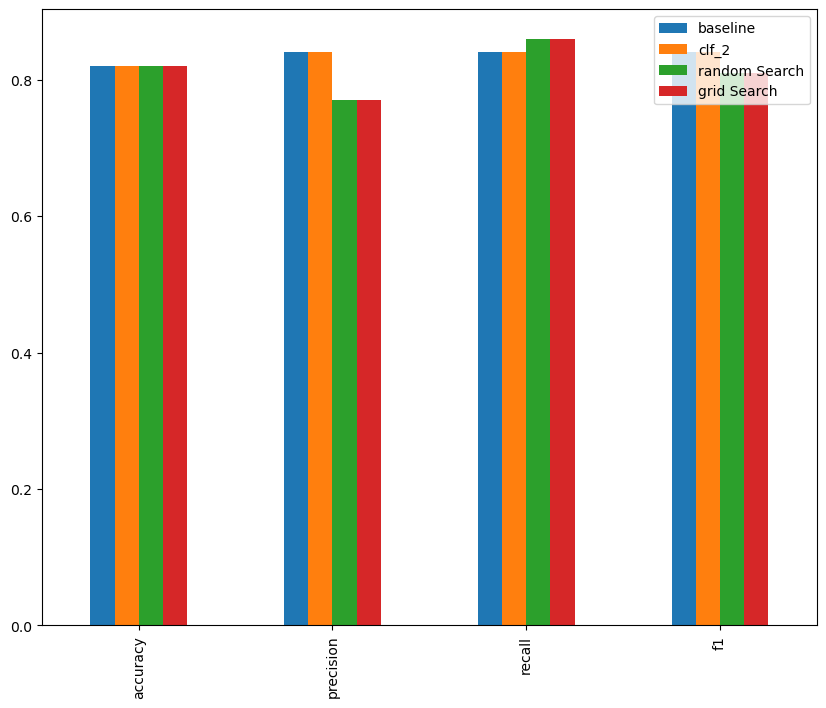

In [21]:
compare_metrics = pd.DataFrame({"baseline":baseline_metrics,
                               "clf_2":clf2_metrics,
                               "random Search":rs_metrics,
                               "grid Search":gs_metrics}
                              )

# make sure all models are trained on the same data
# which is not the case here, hence - it is not correct 
compare_metrics.plot.bar(figsize=(10,8));

In [22]:
compare_metrics

,baseline,clf_2,random Search,grid Search
accuracy,0.82,0.82,0.82,0.82
precision,0.84,0.84,0.77,0.77
recall,0.84,0.84,0.86,0.86
f1,0.84,0.84,0.81,0.81


### 6. Saving and loading machine learning models

Two ways to save and load ML models

1. Python's `pickle` module
2. `joblib` module

#### 6.1: Pickle Module

The pickle module implements binary protocols for serializing and de-serializing a Python object structure.

https://docs.python.org/3/library/pickle.html

In [24]:
import pickle 

# save an existing model to a file
pickle.dump(gs_clf, open("saved_models/gs_random_forest_model_1.pkl","wb"))

In [25]:
# load a saved model
loaded_pickle_model = pickle.load(open("saved_models/gs_random_forest_model_1.pkl","rb"))

In [26]:
#make some predictions 
pickle_y_preds = loaded_pickle_model.predict(x_test)
evaluate_preds(y_test,pickle_y_preds)

Accuracy: 78.69%
Precision: 0.74
Recall: 0.82
F1 Score: 0.78


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}

#### 6.2: Joblib Module
https://joblib.readthedocs.io/en/stable/


In [30]:
from joblib import dump, load

#save model to file
dump(gs_clf,filename='saved_models/gs_random_forest_model_1.joblib')

['saved_models/gs_random_forest_model_1.joblib']

In [31]:
#load the model back
loaded_joblib_model = load(filename='saved_models/gs_random_forest_model_1.joblib')

In [32]:
#evaluated the model

joblib_y_preds = loaded_joblib_model.predict(x_test)

evaluate_preds(y_test, joblib_y_preds)

Accuracy: 78.69%
Precision: 0.74
Recall: 0.82
F1 Score: 0.78


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}

#### Which one to choose when? 
https://scikit-learn.org/stable/model_persistence.html

### 7. Put it all together 

In [33]:
data = pd.read_csv('./../data/car-sales-extended-missing-data.csv')

In [34]:
data.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [38]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [39]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

Putting all together using sklearn pipeline 
#----------------------------------------

1. Fill the missing data
2. Convert data to numbers
3. Build a model on the data

In [54]:
# getting the data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV


# setup random seed
import numpy as np
np.random.seed(42)

# import the data and drop missing values
data = pd.read_csv('./../data/car-sales-extended-missing-data.csv')
data.dropna(subset=["Price"],inplace=True)

# Feature Engineering 
#define the feature and define the transfor pipeline 
categorical_features = ['Make','Colour']
categorical_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='constant',fill_value='missing')),
    ('onehot',OneHotEncoder(handle_unknown='ignore'))])

door_feature = ['Doors']
door_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='constant',fill_value=4))])

numeric_features = ['Odometer (KM)']
numeric_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='mean'))])

#setup preprocessor - fill missing values, then convert to numbers
preprocessor = ColumnTransformer(transformers=[
    ('cat',categorical_transformer,categorical_features),
    ('door',door_transformer,door_feature),
    ('num',numeric_transformer,numeric_features)
    ])

# Creating a preprocessing and modeling pipeline - master pipeline 
model = Pipeline(steps=[('preprocessor',preprocessor),
                       ("model",RandomForestRegressor())])

#split the data
x = data.drop('Price',axis=1)
y = data["Price"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

#fit and score the model - the master pipeline is then triggred from method 
model.fit(x_train, y_train)


model.score(x_test, y_test)
# score is bad - let's do HP

0.22188417408787875

<img src='images/sklearn-whats-happening-with-pipeline.png'>

It is also possible to use `GridSearchCV` or `RandomizedSearchCV` with our `Pipeline`

In [59]:
# Use GridSearchCV with our Regression Pipeline 
# __ -> means we are passing the value 

from sklearn.model_selection import GridSearchCV

pipe_grid = {
    "preprocessor__num__imputer__strategy":['mean','median'],
    "model__n_estimators":[100,1000],
    "model__max_depth":[None,5],
    "model__max_features":['auto'],
    "model__min_samples_split":[2,4]  
}

gs_model = GridSearchCV(model,pipe_grid,cv=5,verbose=2)
gs_model.fit(x_train,y_train)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.2s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=auto, model__min_sampl

[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median; total time=   0.1s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   0.8s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   0.8s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean; total time=   0.8s
[CV] END model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strate

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
         

In [60]:
gs_model.score(x_test,y_test)

0.3339554263158365